In [59]:
import pandas as pd
import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from keras import optimizers
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.metrics import Precision

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

Datos obtenidos de:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv

In [3]:
raw = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
raw.shape

(253680, 22)

In [3]:
raw.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


En los datos crudos tenemos 21 variables independientes para determinar la variable dependiente objetivo **Diabetes_012**, la cual es una variable categorica con tres posibles resultados, 0, 1 o 2, que significan *no diabetes*, *prediabetes* y *diabetes* respectivamente.

Nuestras variables son:
1. HighBP, categorica binaria
1. HighChol, categorica binaria
1. CholCheck, categorica binaria
1. BMI, existen 84 valores enteros unicos dentro del dataset y esta sesgado, favoreciendo valores entre 20 y 40
1. Smoker, categorica binaria
1. Stroke, categorica binaria
1. HeartDiseaseorAttack, categorica binaria
1. HeartDiseaseorAttack, categorica binaria
1. Fruits, categorica binaria
1. Veggies, categorica binaria
1. HvyAlcoholConsump, categorica binaria
1. AnyHealthcare, categorica binaria
1. NoDocbcCost, categorica binaria
1. GenHlth, categorica con cinco posibles valores
1. MentHlth, valores enteros entre 0 y 30 posibles valores con la mayoria de valores siendo 0
1. PhysHlth, comportamiento similar a MentHlth
1. DiffWalk, categorica binaria
1. Sex, categorica binaria
1. Age, categoriza rangos de edades en 13 posibles categorias
1. Education, categoriza el nivel de educacion en 6 posibles categorias
1. Income, categoriza el nivel de ingreso en 8 posibles categorias

La gran mayoria de las variables son categoricas binarias, con excepciones para BMI, MentHlth, PhysHlth, Age, Education e Income.

Las variables categoricas binarias no necesitan ningun preprocesamiento, pero MentHlth, PhysHlth, Age, Education e Income pasaran por one_hot encoding. Por otra parte, BMI seran tratadas como variable numerica, esta variable presenta comportamiento leptocurtico con asimetria positiva, se le aplicara una transformacion logaritmica para normalizar los datos.

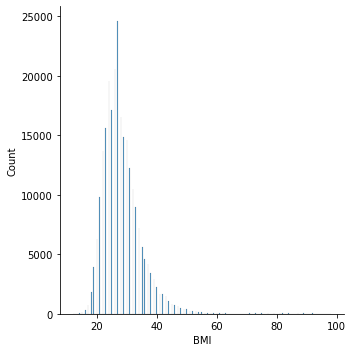

In [47]:
sns.displot(raw.BMI)

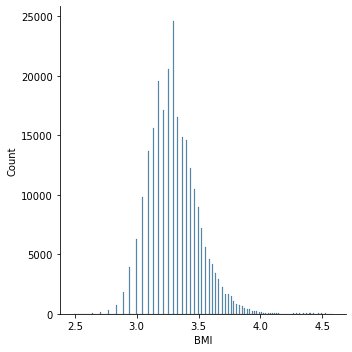

In [51]:
sns.displot(np.log(raw.BMI))

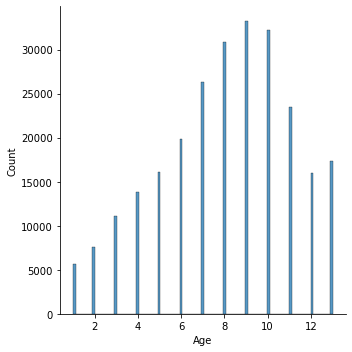

In [10]:
sns.displot(raw.Age)

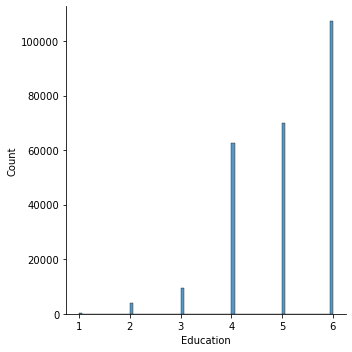

In [12]:
sns.displot(raw.Education)

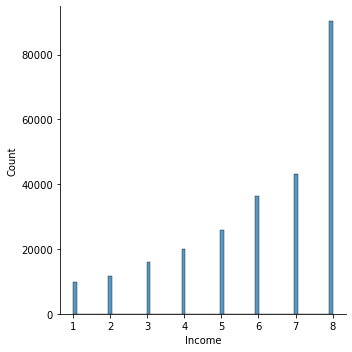

In [50]:
sns.displot(raw.Income)

# Creando nuevo dataset con transformaciones y train/test split

In [4]:
data = pd.get_dummies(data = raw, columns = ["MentHlth", "PhysHlth", "Age", "Education", "Income"])
data.BMI = np.log(raw.BMI)
data.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,MentHlth_0.0,MentHlth_1.0,MentHlth_2.0,MentHlth_3.0,MentHlth_4.0,MentHlth_5.0,MentHlth_6.0,MentHlth_7.0,MentHlth_8.0,MentHlth_9.0,MentHlth_10.0,MentHlth_11.0,MentHlth_12.0,MentHlth_13.0,MentHlth_14.0,MentHlth_15.0,MentHlth_16.0,MentHlth_17.0,MentHlth_18.0,MentHlth_19.0,MentHlth_20.0,MentHlth_21.0,MentHlth_22.0,...,PhysHlth_18.0,PhysHlth_19.0,PhysHlth_20.0,PhysHlth_21.0,PhysHlth_22.0,PhysHlth_23.0,PhysHlth_24.0,PhysHlth_25.0,PhysHlth_26.0,PhysHlth_27.0,PhysHlth_28.0,PhysHlth_29.0,PhysHlth_30.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1.0,1.0,1.0,3.688879,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,3.218876,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,3.332205,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,3.295837,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,3.178054,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,0.0,1.0,1.0,1.0,3.218876,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0.0,1.0,0.0,1.0,3.401197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,0.0,1.0,1.0,1.0,3.218876,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8,2.0,1.0,1.0,1.0,3.401197,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
9,0.0,0.0,0.0,1.0,3.178054,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [28]:
train, test = train_test_split(data, test_size=0.2)
#train, val = train_test_split(pre_train, test_size=0.1)
train.shape

(202944, 106)

In [29]:
train_y = pd.get_dummies(data = train[["Diabetes_012"]], columns = ["Diabetes_012"]).to_numpy()
#val_y = pd.get_dummies(data = val[["Diabetes_012"]], columns = ["Diabetes_012"]).to_numpy()
test_y = pd.get_dummies(data = test[["Diabetes_012"]], columns = ["Diabetes_012"]).to_numpy()


train_x = train.iloc[:,1:].to_numpy()
#val_x = val.iloc[:,1:].to_numpy()
test_x = test.iloc[:,1:].to_numpy()
train_x.shape

(202944, 105)

# Modelado

### Creando una ANN simple
Este se usara como base a comparar contra futuros modelos

In [41]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = "adam",
                   metrics = ["accuracy", Precision()])

simple_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(simple_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 5s 1ms/step - loss: 0.4132 - accuracy: 0.8434 - precision: 0.8486 - val_loss: 0.4032 - val_accuracy: 0.8469 - val_precision: 0.85120s - loss: 0.4132 - accuracy: 0.8435 - precision: 0.
Epoch 2/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4007 - accuracy: 0.8481 - precision: 0.8530 - val_loss: 0.4018 - val_accuracy: 0.8471 - val_precision: 0.8516
Epoch 3/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3970 - accuracy: 0.8486 - precision: 0.8540 - val_loss: 0.3970 - val_accuracy: 0.8479 - val_precision: 0.8520
Epoch 4/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3942 - accuracy: 0.8500 - precision: 0.8553 - val_loss: 0.3985 - val_accuracy: 0.8481 - val_precision: 0.8514
Epoch 5/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3926 - accuracy: 0.8499 - precision: 0.8553 - val_loss: 0.3984 - val_accuracy: 0.8486 - val_precision: 0.8526
Epoch 6/

# Entrenando diferentes modelos


Probando diferentes optimizadores

In [43]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = "nadam",
                   metrics = ["accuracy", Precision()])

simple_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(simple_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4118 - accuracy: 0.8437 - precision_1: 0.8493 - val_loss: 0.4042 - val_accuracy: 0.8462 - val_precision_1: 0.8517
Epoch 2/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4000 - accuracy: 0.8476 - precision_1: 0.8527 - val_loss: 0.4006 - val_accuracy: 0.8482 - val_precision_1: 0.8525
Epoch 3/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3966 - accuracy: 0.8490 - precision_1: 0.8546 - val_loss: 0.3989 - val_accuracy: 0.8484 - val_precision_1: 0.8549
Epoch 4/10
5074/5074 [==============================] - 7s 1ms/step - loss: 0.3945 - accuracy: 0.8501 - precision_1: 0.8557 - val_loss: 0.3988 - val_accuracy: 0.8465 - val_precision_1: 0.8529
Epoch 5/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3926 - accuracy: 0.8503 - precision_1: 0.8559 - val_loss: 0.3988 - val_accuracy: 0.8470 - val_precision_1: 0.8561
Epoch 6/10
5074/5074 [==================

In [45]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = "adagrad",
                   metrics = ["accuracy", Precision()])

simple_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(simple_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4586 - accuracy: 0.8407 - precision_1: 0.8442 - val_loss: 0.4296 - val_accuracy: 0.8416 - val_precision_1: 0.8444
Epoch 2/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4268 - accuracy: 0.8427 - precision_1: 0.8459 - val_loss: 0.4223 - val_accuracy: 0.8424 - val_precision_1: 0.8458
Epoch 3/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4218 - accuracy: 0.8427 - precision_1: 0.8466 - val_loss: 0.4193 - val_accuracy: 0.8423 - val_precision_1: 0.8469
Epoch 4/10
5074/5074 [==============================] - 5s 991us/step - loss: 0.4194 - accuracy: 0.8430 - precision_1: 0.8472 - val_loss: 0.4178 - val_accuracy: 0.8426 - val_precision_1: 0.8474
Epoch 5/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4180 - accuracy: 0.8430 - precision_1: 0.8474 - val_loss: 0.4166 - val_accuracy: 0.8434 - val_precision_1: 0.8479
Epoch 6/10
5074/5074 [================

In [46]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = "sgd",
                   metrics = ["accuracy", Precision()])

simple_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(simple_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4260 - accuracy: 0.8423 - precision: 0.8460 - val_loss: 0.4146 - val_accuracy: 0.8446 - val_precision: 0.8474
Epoch 2/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4115 - accuracy: 0.8448 - precision: 0.8496 - val_loss: 0.4079 - val_accuracy: 0.8462 - val_precision: 0.8520
Epoch 3/10
5074/5074 [==============================] - 5s 981us/step - loss: 0.4073 - accuracy: 0.8459 - precision: 0.8510 - val_loss: 0.4045 - val_accuracy: 0.8460 - val_precision: 0.8513
Epoch 4/10
5074/5074 [==============================] - 5s 1ms/step - loss: 0.4044 - accuracy: 0.8469 - precision: 0.8516 - val_loss: 0.4024 - val_accuracy: 0.8467 - val_precision: 0.8503
Epoch 5/10
5074/5074 [==============================] - 5s 998us/step - loss: 0.4018 - accuracy: 0.8478 - precision: 0.8525 - val_loss: 0.4005 - val_accuracy: 0.8475 - val_precision: 0.8540 loss: 0 - ETA: 1s - los
Epoch 6/10
5074/5074 [==========

Parece que el optimizador de nadam fue provee la mejor combinacion de accuracy y precision, por lo que se experimentarara con las capas usando este estimador

In [47]:
ann = Sequential()
ann.add(Dense(units = 512, activation = "relu", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 256, activation = "relu", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 128, activation = "tanh", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 3, activation = 'softmax'))

ann.compile(loss = "categorical_crossentropy",
                   optimizer = "nadam",
                   metrics = ["accuracy", Precision()])

ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 13s 3ms/step - loss: 0.4101 - accuracy: 0.8449 - precision: 0.8495 - val_loss: 0.4112 - val_accuracy: 0.8413 - val_precision: 0.8478
Epoch 2/10
5074/5074 [==============================] - 13s 3ms/step - loss: 0.4006 - accuracy: 0.8479 - precision: 0.8527 - val_loss: 0.4013 - val_accuracy: 0.8468 - val_precision: 0.8502
Epoch 3/10
5074/5074 [==============================] - 14s 3ms/step - loss: 0.3977 - accuracy: 0.8484 - precision: 0.8532 - val_loss: 0.4003 - val_accuracy: 0.8477 - val_precision: 0.8537
Epoch 4/10
5074/5074 [==============================] - 14s 3ms/step - loss: 0.3954 - accuracy: 0.8488 - precision: 0.8540 - val_loss: 0.3973 - val_accuracy: 0.8479 - val_precision: 0.8517
Epoch 5/10
5074/5074 [==============================] - 13s 3ms/step - loss: 0.3934 - accuracy: 0.8499 - precision: 0.8554 - val_loss: 0.3993 - val_accuracy: 0.8486 - val_precision: 0.8522
Epoch 6/10
5074/5074 [==============================] -

In [48]:
ann = Sequential()
ann.add(Dense(units = 210, activation = "tanh", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 3, activation = 'softmax'))

ann.compile(loss = "categorical_crossentropy",
                   optimizer = "nadam",
                   metrics = ["accuracy", Precision()])

ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4112 - accuracy: 0.8444 - precision: 0.8494 - val_loss: 0.4013 - val_accuracy: 0.8475 - val_precision: 0.8508
Epoch 2/10
5074/5074 [==============================] - 5s 1ms/step - loss: 0.4011 - accuracy: 0.8469 - precision: 0.8522 - val_loss: 0.3979 - val_accuracy: 0.8489 - val_precision: 0.8523
Epoch 3/10
5074/5074 [==============================] - 5s 1ms/step - loss: 0.3991 - accuracy: 0.8471 - precision: 0.8528 - val_loss: 0.4008 - val_accuracy: 0.8469 - val_precision: 0.8487
Epoch 4/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3979 - accuracy: 0.8478 - precision: 0.8534 - val_loss: 0.3959 - val_accuracy: 0.8483 - val_precision: 0.8546
Epoch 5/10
5074/5074 [==============================] - 7s 1ms/step - loss: 0.3967 - accuracy: 0.8487 - precision: 0.8541 - val_loss: 0.4074 - val_accuracy: 0.8465 - val_precision: 0.8482
Epoch 6/10
5074/5074 [==============================] - 7s 1

In [50]:
ann = Sequential()
ann.add(Dense(units = 512, activation = "relu", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 256, activation = "relu", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 128, activation = "relu", input_shape = (train_x.shape[1], )))
ann.add(Dense(units = 3, activation = 'softmax'))

ann.compile(loss = "categorical_crossentropy",
                   optimizer = optimizers.nadam(learning_rate=0.0001)
                   metrics = ["accuracy", Precision()])

ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 13s 3ms/step - loss: 0.4106 - accuracy: 0.8448 - precision: 0.8504 - val_loss: 0.4079 - val_accuracy: 0.8451 - val_precision: 0.8607
Epoch 2/10
5074/5074 [==============================] - 14s 3ms/step - loss: 0.4010 - accuracy: 0.8476 - precision: 0.8530 - val_loss: 0.4014 - val_accuracy: 0.8472 - val_precision: 0.8497
Epoch 3/10
5074/5074 [==============================] - 14s 3ms/step - loss: 0.3976 - accuracy: 0.8487 - precision: 0.8535 - val_loss: 0.3983 - val_accuracy: 0.8479 - val_precision: 0.8526
Epoch 4/10
5074/5074 [==============================] - 15s 3ms/step - loss: 0.3952 - accuracy: 0.8493 - precision: 0.8546 - val_loss: 0.3987 - val_accuracy: 0.8473 - val_precision: 0.8540
Epoch 5/10
5074/5074 [==============================] - 14s 3ms/step - loss: 0.3929 - accuracy: 0.8502 - precision: 0.8559 - val_loss: 0.4030 - val_accuracy: 0.8459 - val_precision: 0.8475
Epoch 6/10
5074/5074 [==============================] -

In [52]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                   metrics = ["accuracy", Precision()])

simple_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 10,
              validation_split = 0.2)

print(simple_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4272 - accuracy: 0.8426 - precision: 0.8472 - val_loss: 0.4124 - val_accuracy: 0.8448 - val_precision: 0.8470
Epoch 2/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4070 - accuracy: 0.8459 - precision: 0.8511 - val_loss: 0.4047 - val_accuracy: 0.8467 - val_precision: 0.8511
Epoch 3/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4027 - accuracy: 0.8476 - precision: 0.8524 - val_loss: 0.4022 - val_accuracy: 0.8473 - val_precision: 0.8533
Epoch 4/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3997 - accuracy: 0.8483 - precision: 0.8534 - val_loss: 0.3993 - val_accuracy: 0.8482 - val_precision: 0.8533
Epoch 5/10
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3973 - accuracy: 0.8490 - precision: 0.8538 - val_loss: 0.3977 - val_accuracy: 0.8488 - val_precision: 0.8526
Epoch 6/10
5074/5074 [==============================] - 6s 1

Reducir el learning rate ayudo a mejorar el accuracy con el set de prueba, asi que se entrenara un modelo de mas epocas usando un bajo learning rate

In [54]:
simple_ann = Sequential()
simple_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
simple_ann.add(Dense(units = 3, activation = 'softmax'))

simple_ann.compile(loss = "categorical_crossentropy",
                   optimizer = optimizers.Nadam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                   metrics = ["accuracy", Precision()])

simple_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 50,
              validation_split = 0.2)

print(simple_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.5006 - accuracy: 0.8425 - precision_1: 0.8426 - val_loss: 0.4363 - val_accuracy: 0.8429 - val_precision_1: 0.8441
Epoch 2/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4280 - accuracy: 0.8430 - precision_1: 0.8456 - val_loss: 0.4209 - val_accuracy: 0.8428 - val_precision_1: 0.8466
Epoch 3/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4189 - accuracy: 0.8432 - precision_1: 0.8473 - val_loss: 0.4162 - val_accuracy: 0.8432 - val_precision_1: 0.8473
Epoch 4/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4152 - accuracy: 0.8437 - precision_1: 0.8481 - val_loss: 0.4139 - val_accuracy: 0.8436 - val_precision_1: 0.8485
Epoch 5/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.4132 - accuracy: 0.8443 - precision_1: 0.8488 - val_loss: 0.4125 - val_accuracy: 0.8443 - val_precision_1: 0.8490
Epoch 6/50
5074/5074 [==================

5074/5074 [==============================] - 7s 1ms/step - loss: 0.3956 - accuracy: 0.8501 - precision_1: 0.8551 - val_loss: 0.3981 - val_accuracy: 0.8480 - val_precision_1: 0.8531
Epoch 44/50
5074/5074 [==============================] - 7s 1ms/step - loss: 0.3954 - accuracy: 0.8502 - precision_1: 0.8551 - val_loss: 0.3980 - val_accuracy: 0.8480 - val_precision_1: 0.8535
Epoch 45/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3951 - accuracy: 0.8502 - precision_1: 0.8550 - val_loss: 0.3978 - val_accuracy: 0.8479 - val_precision_1: 0.8529
Epoch 46/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3949 - accuracy: 0.8503 - precision_1: 0.8555 - val_loss: 0.3977 - val_accuracy: 0.8478 - val_precision_1: 0.8526
Epoch 47/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3946 - accuracy: 0.8504 - precision_1: 0.8553 - val_loss: 0.3975 - val_accuracy: 0.8481 - val_precision_1: 0.8531
Epoch 48/50
5074/5074 [========================

Se observa un comportamiento oscilatorio en cuanto al accuracy del set de validacion y el de prueba no llega a 0.85, sin embargo en ambos casos el accuracy si se aproxima a 0.85.

En este caso, se decide mejor trabajar con un modelo mas sencillo y no sacrificar computo

In [60]:
final_ann = Sequential()
final_ann.add(Dense(units = 210, activation = "relu", input_shape = (train_x.shape[1], )))
final_ann.add(Dense(units = 3, activation = 'softmax'))

final_ann.compile(loss = "categorical_crossentropy",
                   optimizer = "nadam",
                   metrics = ["accuracy", Precision()])

earlyStopping = EarlyStopping(monitor="val_accuracy", patience=10, verbose=0, mode="max")
mcp_save = ModelCheckpoint("diabetes_resulting_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")

final_ann.fit(train_x, train_y,
              batch_size = 32,
              epochs = 50,
              validation_split = 0.2,
             callbacks=[earlyStopping, mcp_save])

print(final_ann.evaluate(test_x, test_y))
clear_session()

Epoch 1/50
5074/5074 [==============================] - 7s 1ms/step - loss: 0.4108 - accuracy: 0.8441 - precision_1: 0.8496 - val_loss: 0.4037 - val_accuracy: 0.8469 - val_precision_1: 0.8514
Epoch 2/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3996 - accuracy: 0.8479 - precision_1: 0.8529 - val_loss: 0.3999 - val_accuracy: 0.8473 - val_precision_1: 0.8537accuracy: 0.8480 - precision_1: 0.85
Epoch 3/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3964 - accuracy: 0.8493 - precision_1: 0.8546 - val_loss: 0.3972 - val_accuracy: 0.8489 - val_precision_1: 0.8549
Epoch 4/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3945 - accuracy: 0.8492 - precision_1: 0.8548 - val_loss: 0.3989 - val_accuracy: 0.8468 - val_precision_1: 0.8525
Epoch 5/50
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3927 - accuracy: 0.8501 - precision_1: 0.8556 - val_loss: 0.3984 - val_accuracy: 0.8482 - val_precision_1: 0.8552
Epoc